In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LTV.csv')
df.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6877,VQ72305,California,20266.498770,No,Basic,High School or Below,1/19/11,Employed,M,21542,...,37,0,2,Special Auto,Special L2,Offer4,Branch,494.400000,Sports Car,Small
2329,CV90092,Oregon,8184.691323,No,Basic,College,1/16/11,Employed,M,82680,...,86,0,2,Corporate Auto,Corporate L3,Offer1,Branch,326.400000,Four-Door Car,Medsize
1474,CA56041,Nevada,9120.065162,No,Basic,College,2/16/11,Employed,F,63878,...,47,0,9,Personal Auto,Personal L3,Offer3,Call Center,370.285349,SUV,Small
7902,TR18791,Arizona,2471.441785,No,Basic,Bachelor,1/5/11,Unemployed,M,0,...,14,0,1,Personal Auto,Personal L1,Offer1,Branch,504.000000,Two-Door Car,Small
1720,EP82214,Arizona,26180.805280,No,Extended,High School or Below,1/7/11,Employed,F,68189,...,17,1,2,Special Auto,Special L2,Offer2,Branch,343.121192,Four-Door Car,Medsize
5255,XW51700,Arizona,5139.561422,No,Basic,High School or Below,2/14/11,Employed,F,73180,...,43,0,3,Personal Auto,Personal L3,Offer3,Call Center,132.543257,Four-Door Car,Medsize
2929,IY24560,California,5288.240125,No,Basic,Bachelor,2/11/11,Medical Leave,M,28884,...,9,1,3,Corporate Auto,Corporate L3,Offer2,Agent,518.400000,Four-Door Car,Medsize
197,ZW25874,Oregon,2521.555686,No,Basic,Bachelor,2/16/11,Employed,M,53703,...,45,2,1,Special Auto,Special L3,Offer1,Branch,67.632476,Four-Door Car,Medsize
7179,QH27767,Oregon,5308.291752,No,Basic,Doctor,1/26/11,Employed,M,82601,...,38,0,3,Personal Auto,Personal L2,Offer4,Agent,186.387874,Four-Door Car,Medsize
3544,YG87460,Arizona,2444.741307,No,Basic,College,1/16/11,Unemployed,M,0,...,59,1,1,Personal Auto,Personal L2,Offer3,Branch,244.587596,Four-Door Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
X = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

In [5]:
X['Customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

In [6]:
X['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

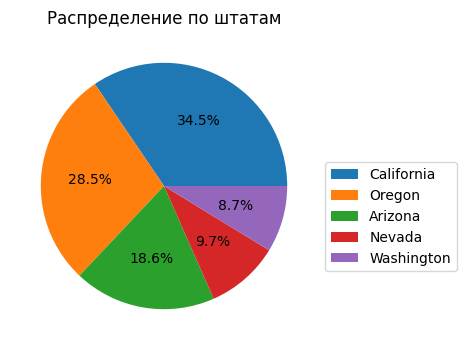

In [7]:
plt.figure(figsize=(6, 4))
plt.pie(X['State'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение по штатам')
plt.legend(X['State'].value_counts().index, bbox_to_anchor=(1, 0.6))

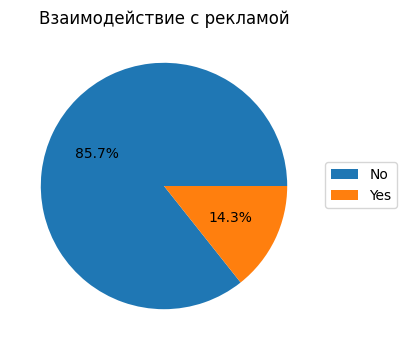

In [8]:
plt.figure(figsize=(6, 4))
plt.pie(X['Response'].value_counts(), autopct='%1.1f%%')
plt.title('Взаимодействие с рекламой')
plt.legend(X['Response'].value_counts().index, bbox_to_anchor=(1, 0.6))

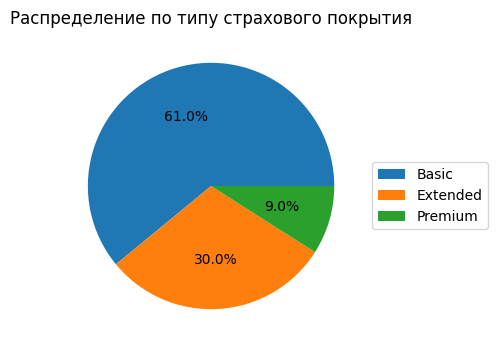

In [9]:
plt.figure(figsize=(6, 4))
plt.pie(X['Coverage'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение по типу страхового покрытия')
plt.legend(X['Coverage'].value_counts().index, bbox_to_anchor=(1, 0.6))

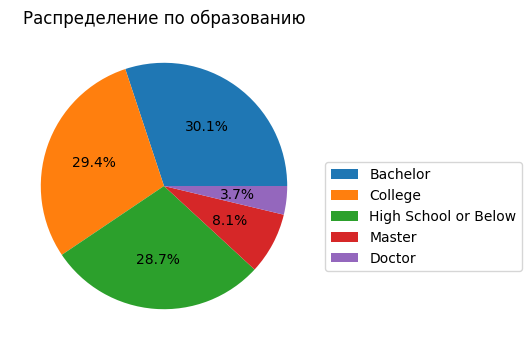

In [10]:
plt.figure(figsize=(6, 4))
plt.pie(X['Education'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение по образованию')
plt.legend(X['Education'].value_counts().index, bbox_to_anchor=(1, 0.6))

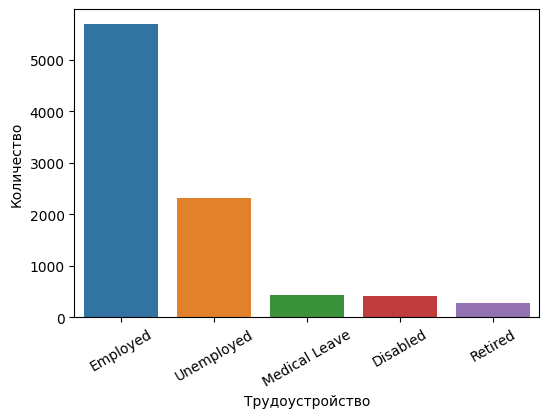

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(X['EmploymentStatus'].value_counts().index, y=X['EmploymentStatus'].value_counts().values)
plt.xlabel('Трудоустройство')
plt.ylabel('Количество')
plt.xticks(rotation=30);

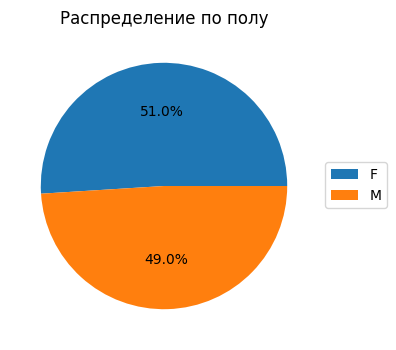

In [12]:
plt.figure(figsize=(6, 4))
plt.pie(X['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.legend(X['Gender'].value_counts().index, bbox_to_anchor=(1, 0.6))

Text(0.5, 1.0, 'Доход')

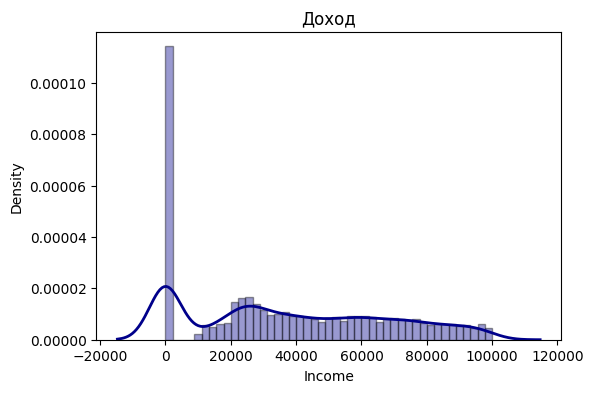

In [13]:
plt.figure(figsize=(6,4))
sns.distplot(X['Income'], hist=True, kde=True,
    bins=45, color='darkblue',
    hist_kws={'edgecolor': 'black'},
    kde_kws={'linewidth': 2})
plt.title('Доход')

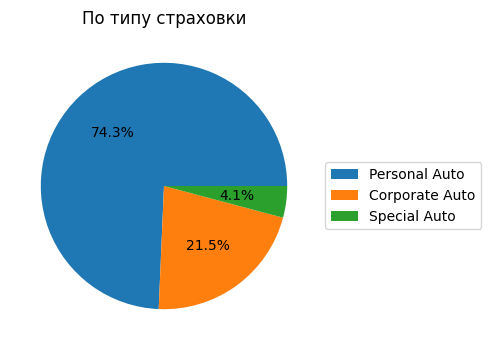

In [14]:
plt.figure(figsize=(6, 4))
plt.pie(X['Policy Type'].value_counts(), autopct='%1.1f%%')
plt.title('По типу страховки')
plt.legend(X['Policy Type'].value_counts().index, bbox_to_anchor=(1, 0.6))

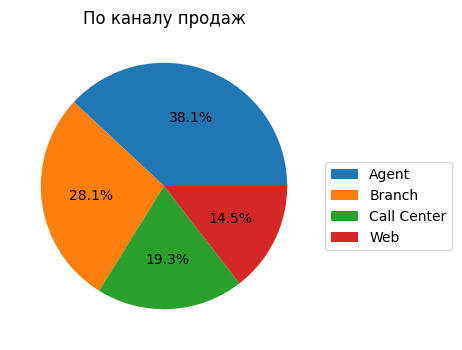

In [15]:
plt.figure(figsize=(6, 4))
plt.pie(X['Sales Channel'].value_counts(), autopct='%1.1f%%')
plt.title('По каналу продаж')
plt.legend(X['Sales Channel'].value_counts().index, bbox_to_anchor=(1, 0.6))

Text(0.5, 1.0, 'Сумма выплаченных компенсаций')

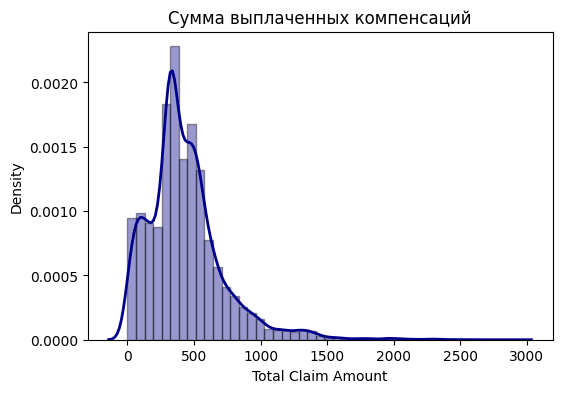

In [16]:
plt.figure(figsize=(6,4))
sns.distplot(X['Total Claim Amount'], hist=True, kde=True,
    bins=45, color='darkblue',
    hist_kws={'edgecolor': 'black'},
    kde_kws={'linewidth': 2})
plt.title('Сумма выплаченных компенсаций')

Text(0.5, 1.0, 'LTV пользователя')

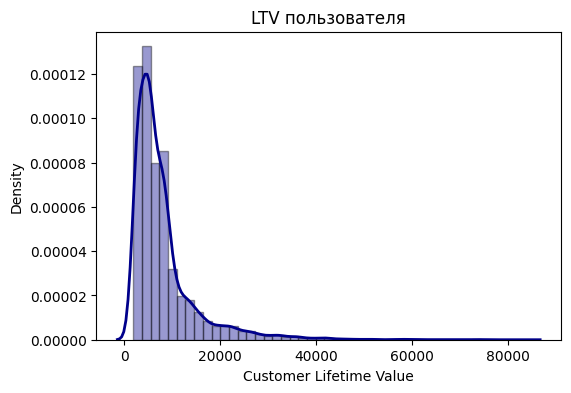

In [17]:
plt.figure(figsize=(6,4))
sns.distplot(y, hist=True, kde=True,
    bins=45, color='darkblue',
    hist_kws={'edgecolor': 'black'},
    kde_kws={'linewidth': 2})
plt.title('LTV пользователя')

In [18]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [19]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    

X.sample(10)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3556,6874,3,0,0,3,11,1,1,76214,2,...,48,0,2,2,7,1,3,202.813730,0,1
2830,5883,2,0,1,4,51,1,0,99654,0,...,95,0,3,1,5,2,2,272.788141,3,1
9073,8255,1,0,0,1,42,4,0,0,1,...,29,2,3,0,2,0,0,523.030597,0,2
4256,2216,2,0,0,0,32,4,1,0,1,...,52,0,2,1,3,0,0,345.600000,0,1
9087,2418,1,0,2,4,16,1,0,30361,2,...,48,1,1,1,4,1,1,373.289571,0,1
61,6220,1,0,2,0,14,2,0,11489,1,...,50,0,6,1,5,0,2,504.000000,5,2
1872,8141,0,0,1,0,22,1,0,99364,1,...,37,0,5,1,4,3,3,580.800000,4,2
3727,4948,1,0,0,4,4,1,1,77265,0,...,10,0,3,2,8,1,1,170.689399,5,1
5968,8309,0,0,0,3,48,1,1,93872,2,...,6,0,6,1,5,3,3,206.495442,0,1
431,7076,4,0,0,1,14,1,0,39783,1,...,43,0,1,1,3,0,1,345.600000,5,1


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [21]:
y = y.astype(int)

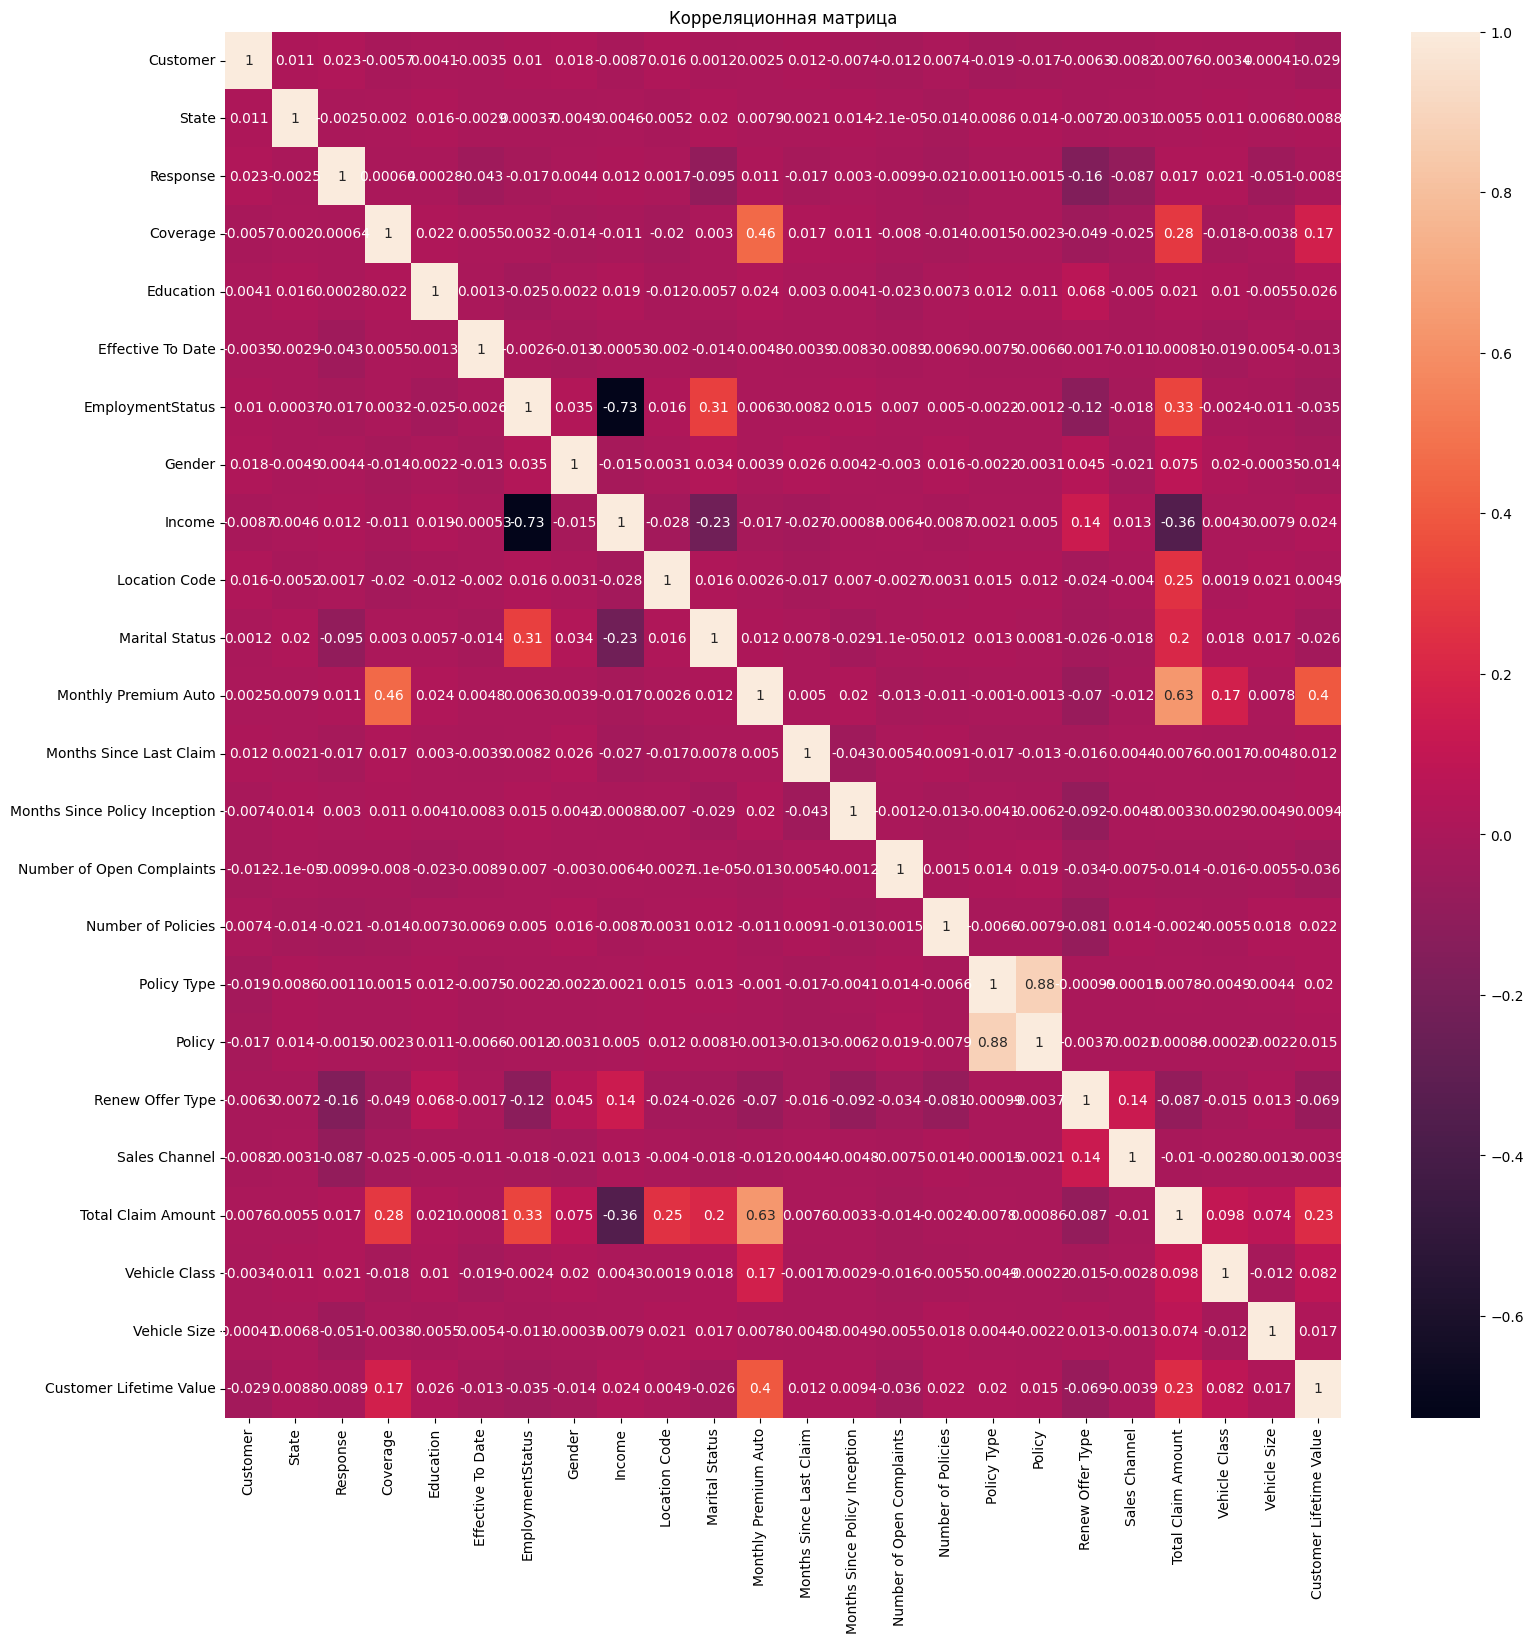

In [22]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

In [29]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
# Оценка качества модели
predictions = model.predict(X_test)
print(f'R^2 score: {r2_score(y_test, predictions):.2f}')

R^2 score: 0.66
